# Week 5 Lab (Logistic Regression)
## COSC 3337 Dr. Rizk

### About The Data
Our goal for this lab is to construct a model that can take a certain set of features related to the Titanic and predict whether a person survived or not (0 or 1). Since we're trying to predict a binary categorical variable (1 or 0), logistic regression seems like a good place to start from.

The dataset that we'll be using for this task comes from kaggle.com and contains the following attributes:
- PassengerId
- Survived (0 or 1)
- Pclass: Ticket class (1, 2, or 3 where 3 is the lowest class)
- Name
- Sex
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Note before starting: Please refer back to the matplotlib lab if you're having trouble creating any graphs up to this point. You're free to use any library to create your graphs, so don't feel like you need to match this code 100%.

## Exploratory Data Analysis
Let's begin by importing some necessary libraries that we'll be using to explore the data.

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

First, let's load our data into a pandas DataFrame and take a look at the first few rows:

In [158]:
# Load the data
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's use `describe()` to get some basic statistics about our numerical columns:

In [159]:
# Get basic statistics of the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now let's check the information about our dataset, including data types and missing values:

In [160]:
# Get information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's visualize our missing data to better understand what we need to handle:

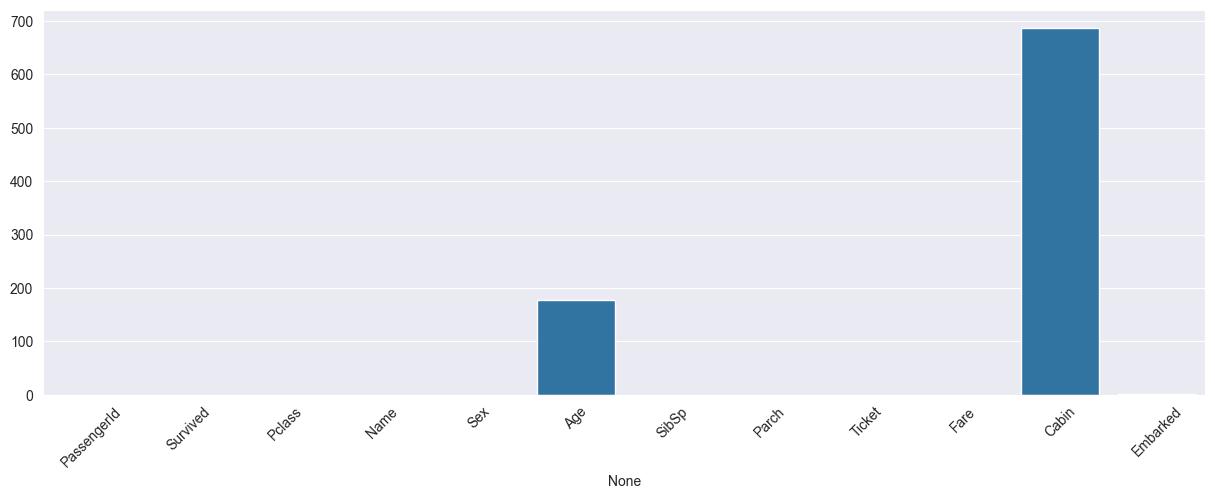

In [161]:
# Visualize missing data
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [162]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [163]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Different example

In [164]:
titanic_data.isnull().sum().index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [165]:
titanic_data.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2])

Let's explore the survival distribution in our dataset:

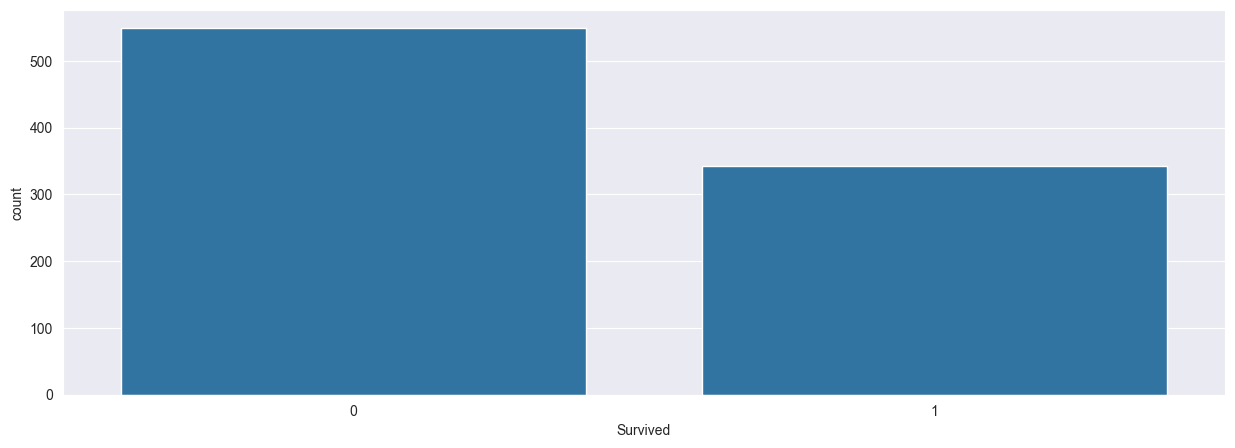

In [166]:
# Plot survival count
sns.countplot(x=titanic_data['Survived'])
plt.show()

### Different examples

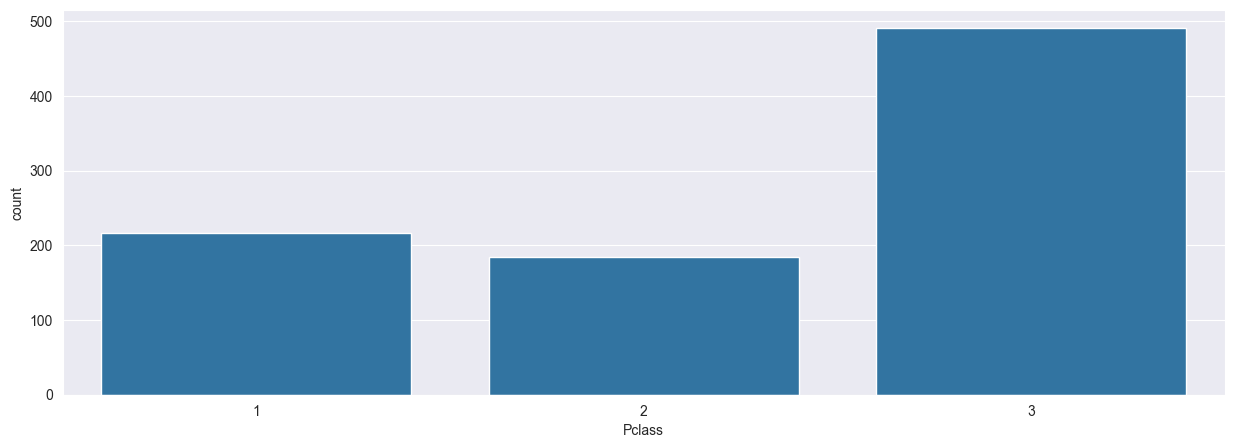

In [167]:
sns.countplot(x=titanic_data['Pclass'])
plt.show()

Now let's see how survival rates differed between males and females:

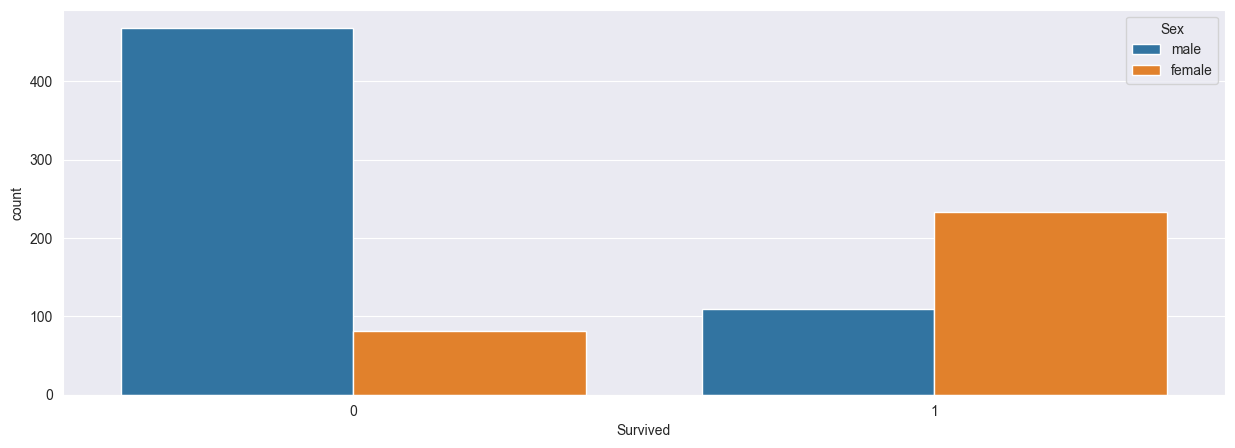

In [168]:
# Plot survival by sex
sns.countplot(x=titanic_data['Survived'], hue='Sex', data=titanic_data)
plt.show()

### Different example Pclass by sex

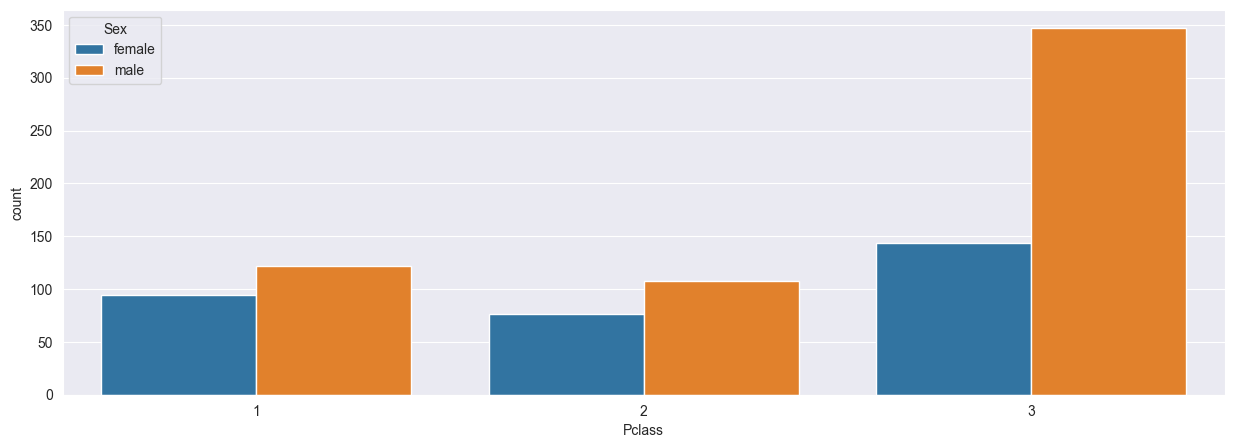

In [169]:
sns.countplot(x=titanic_data['Pclass'], hue='Sex', data=titanic_data)
plt.show()

Let's also examine how passenger class affected survival:

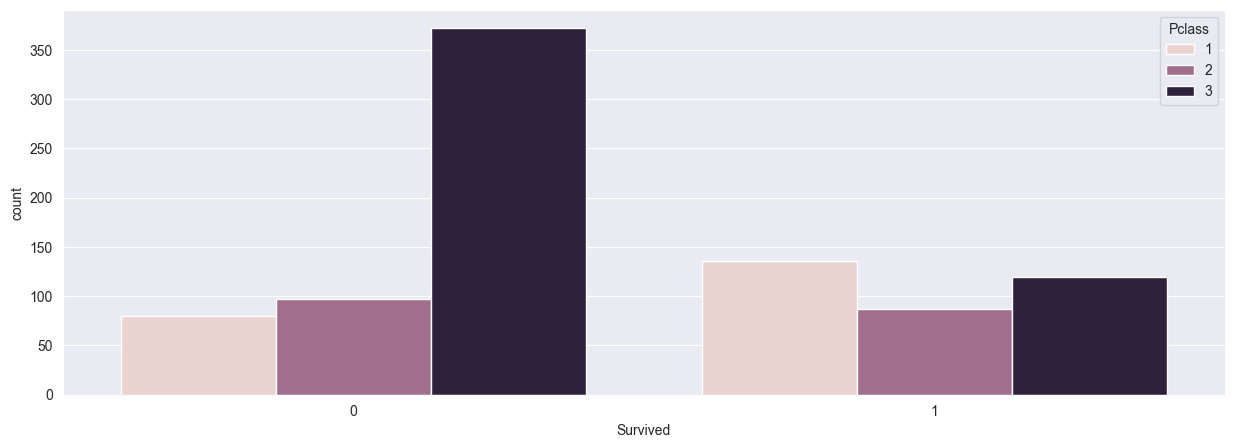

In [170]:
# Plot survival by class
sns.countplot(x=titanic_data['Survived'], hue='Pclass', data=titanic_data)
plt.show()

### Different example

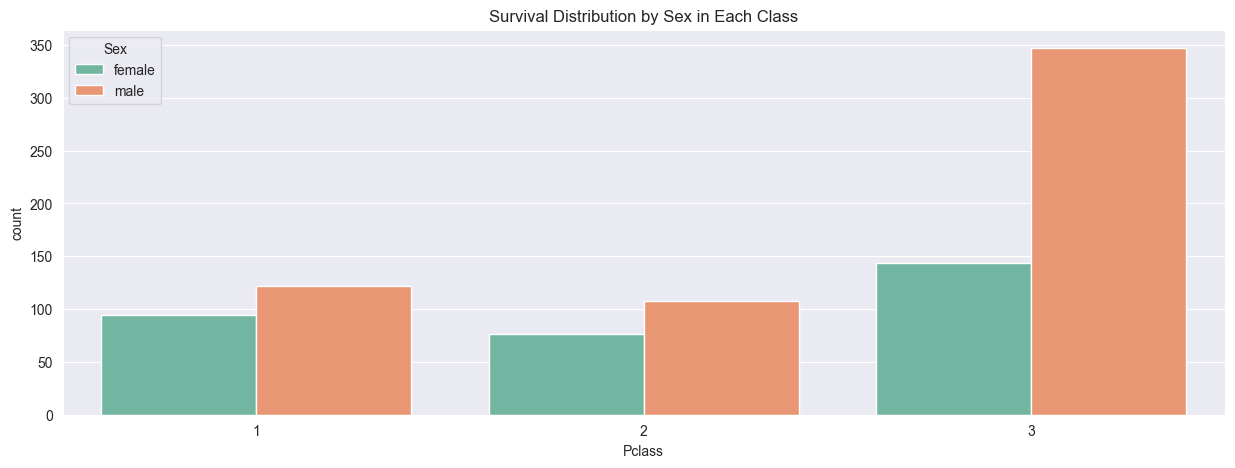

In [171]:
sns.countplot(x='Pclass', hue='Sex', data=titanic_data, palette='Set2', dodge=True)
plt.title("Survival Distribution by Sex in Each Class")
plt.show()

Let's look at the age distribution of passengers:

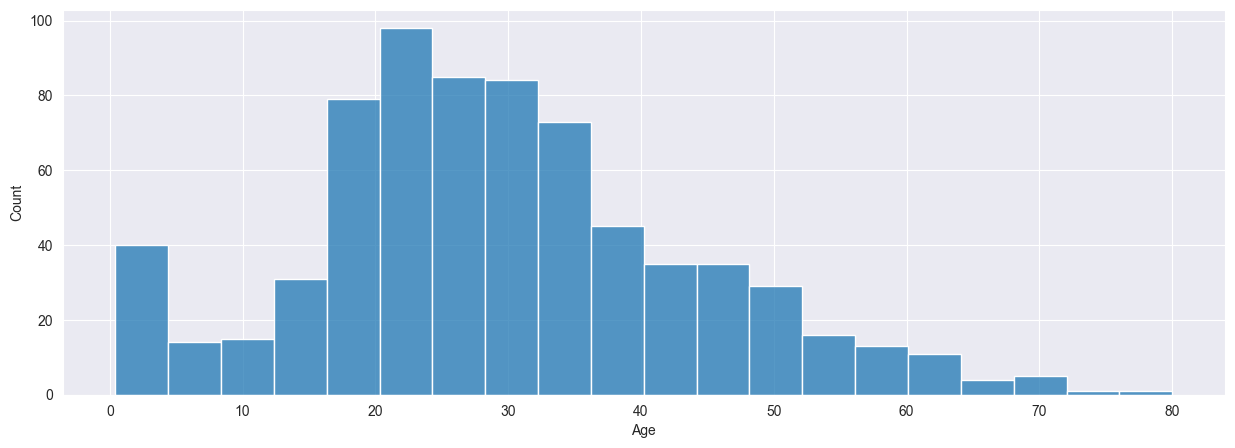

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [172]:
# Age distribution
sns.histplot(x=titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()

### Different example

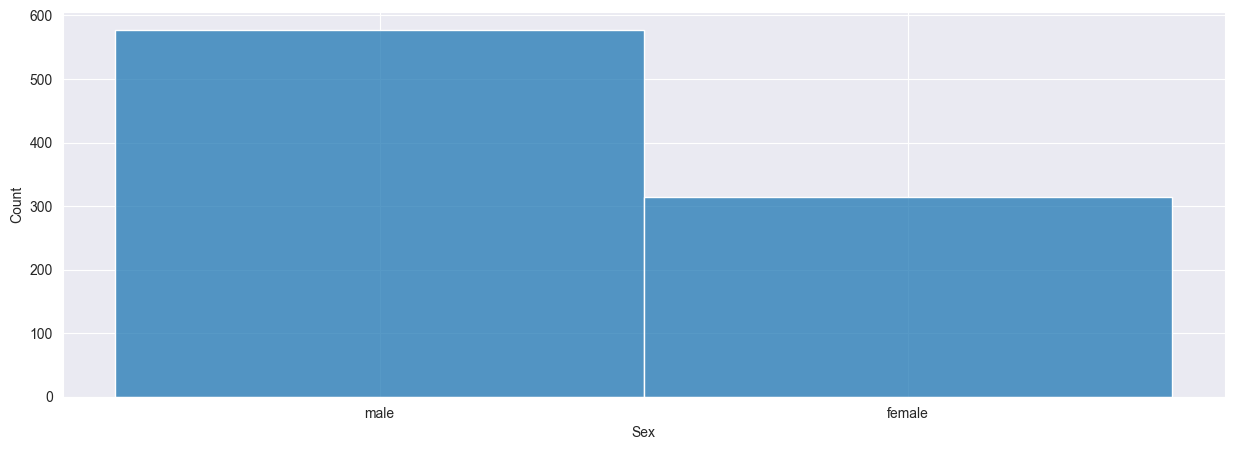

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [173]:
sns.histplot(x=titanic_data['Sex'].dropna())
plt.show()
titanic_data['Sex'].describe()

Let's see the distribution of siblings/spouses aboard:

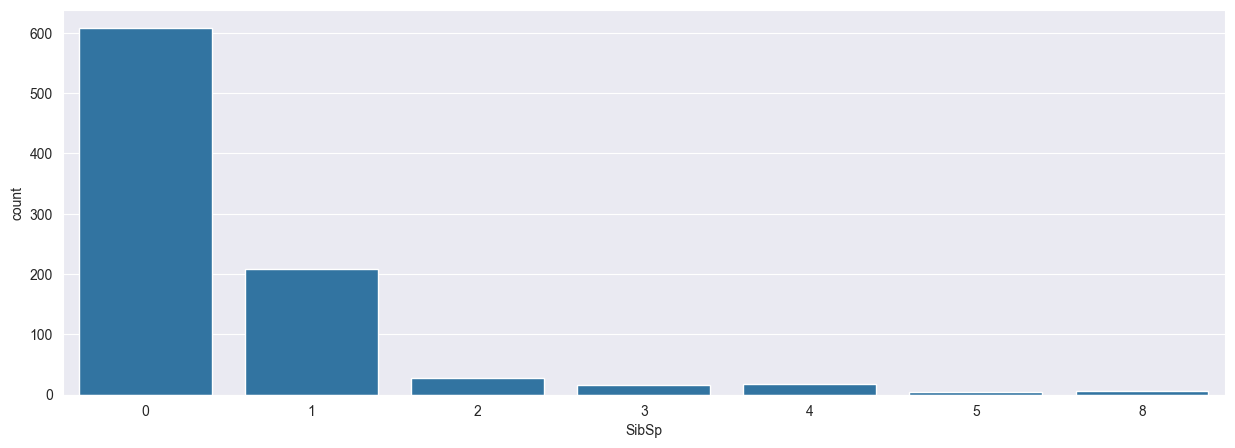

In [174]:
# SibSp distribution
sns.countplot(x=titanic_data['SibSp'])
plt.show()

### Different example

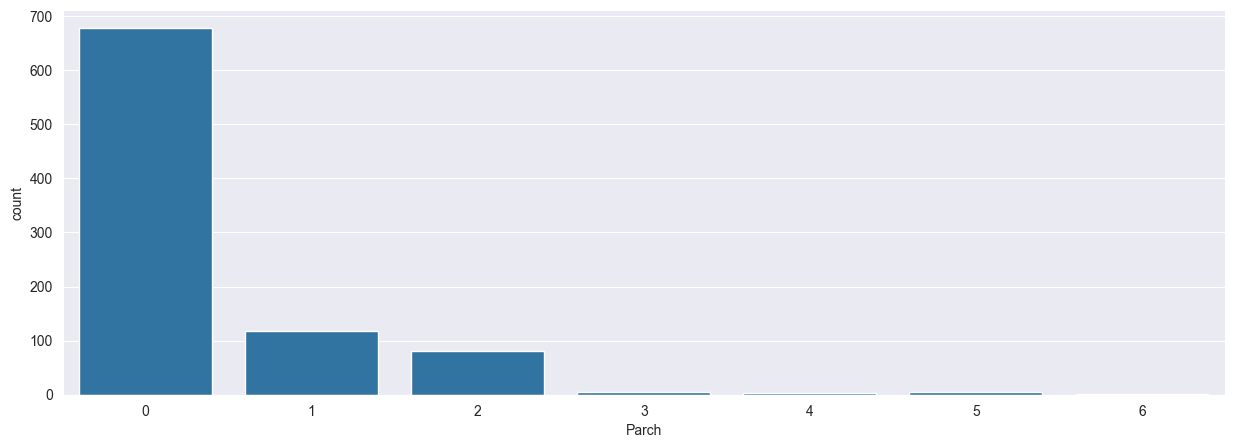

In [175]:
sns.countplot(x=titanic_data['Parch'])
plt.show()

Finally, let's examine the fare distribution:

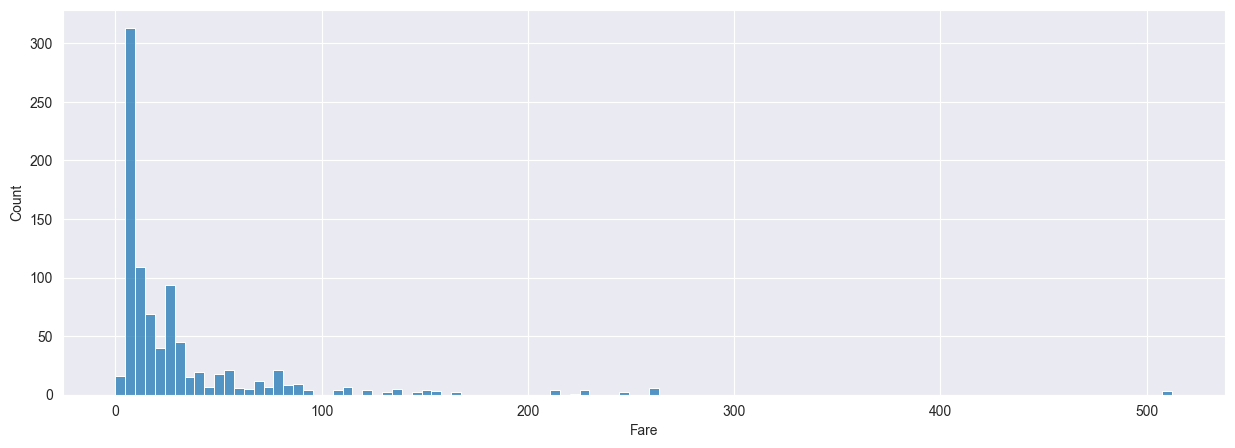

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [176]:
# Fare distribution
sns.histplot(x=titanic_data['Fare'])
plt.show()
titanic_data['Fare'].describe()

### Different example

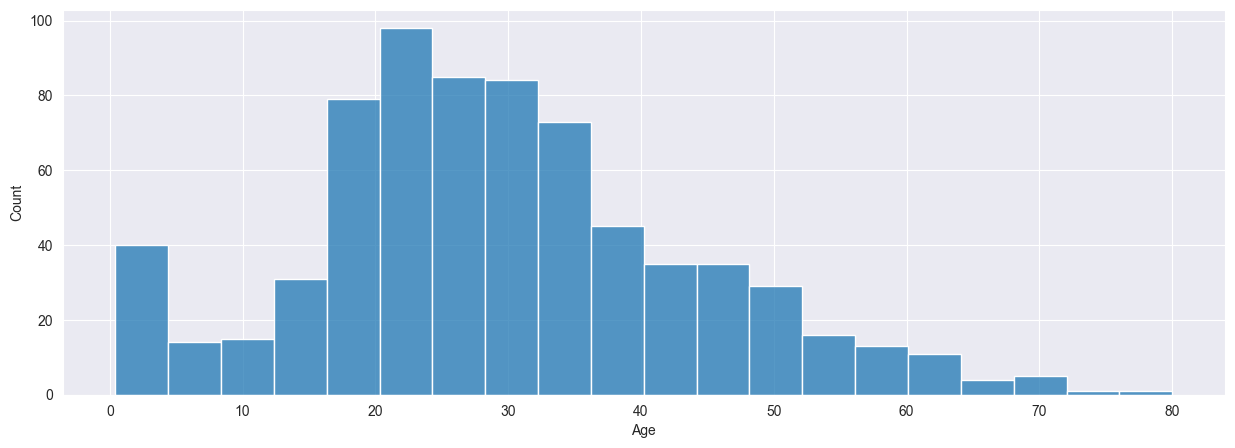

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [177]:
sns.histplot(x=titanic_data['Age'])
plt.show()
titanic_data['Age'].describe()

## Data Preprocessing
Now that we've explored our data, let's handle the missing values and prepare our data for modeling.

In [178]:
# Handle missing age values
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)
# Drop Cabin column and remove remaining null values
titanic_data.drop(labels=['Cabin'], axis=1, inplace=True)
titanic_data.dropna(inplace=True)

In [179]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Now let's handle our categorical variables by creating dummy variables:

In [180]:
# Create dummy variables and drop unnecessary columns
titanic_data = pd.get_dummies(data=titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
titanic_data.drop(labels=['Name','Ticket'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## Creating our Logistic Regression Model
Now we're ready to split our data and create our model:

In [181]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [182]:
# Create and train the model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Different example

In [183]:
from sklearn.model_selection import train_test_split

X2 = titanic_data[['PassengerId', 'Pclass', 'Survived', 'SibSp', 'Parch', 'Fare','Age', 'Embarked_Q', 'Embarked_S']]
y2 = titanic_data['Sex_male']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

from sklearn.linear_model import LogisticRegression

logmodel2 = LogisticRegression(max_iter=2000)
logmodel2.fit(X2_train,y2_train)

LogisticRegression(max_iter=2000)

## Model Evaluation
Let's evaluate how well our model performs:

In [184]:
# Make predictions
predictions = logmodel.predict(X_test)

In [185]:
# Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       171
           1       0.68      0.67      0.67        96

    accuracy                           0.77       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267

[[141  30]
 [ 32  64]]


### Different examples

In [186]:
predictions2 = logmodel2.predict(X2_test)
print(classification_report(y2_test,predictions2))
print(confusion_matrix(y2_test,predictions2))

              precision    recall  f1-score   support

       False       0.65      0.82      0.73        84
        True       0.91      0.80      0.85       183

    accuracy                           0.81       267
   macro avg       0.78      0.81      0.79       267
weighted avg       0.83      0.81      0.81       267

[[ 69  15]
 [ 37 146]]


### Conclusion
Our model achieves decent performance with approximately 82% accuracy. Some observations from our model:
- It's better at predicting non-survivors (85% precision) than survivors (77% precision)
- The model has balanced recall between classes
- There's room for improvement through feature engineering and parameter tuning
